In [1]:
import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!pip install torchvision

In [4]:
# !pip install torch-lr-finder

In [5]:
# !pip install opendatasets

In [6]:
from torchvision import models
import torch
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

import pathlib
import matplotlib.pyplot as plt
import torch.optim as optim
import glob
import random
from PIL import Image

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
# import opendatasets as od
import random
from tqdm import tqdm
import pickle

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# od.download('https://www.kaggle.com/gndctrl2mjrtm/auvsi-suas-dataset')

In [8]:
# /content/auvsi-suas-dataset/generated_data/generated_data/letters/A

In [9]:
# alpha_numeric = glob.glob("/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/*")
# print(alpha_numeric[:37])

# all = []
# for filename in tqdm(alpha_numeric[:37]):
#   # glob.glob("/content/drive/MyDrive/SyntheticData/NewDataset/DatasetOrient/*")
#   li = glob.glob(filename+"/*")
#   # print(len(li))
#   all.extend(li)
# # all = list(set(all))
# # /content/drive/MyDrive/SyntheticData/NewDataset/noisy_shapes_syn_kaggle
# # all = glob.glob("/content/drive/MyDrive/SyntheticData/NewDataset/noisy_shapes_syn_kaggle/*")
# all = all[0::5]


In [10]:
# random.Random(4).shuffle(all)
# print(all[:5])
# # all = all[:20]
# len_all = len(all)
# train_list = all[:int(len_all*0.8)]
# valid_list = all[int(len_all*0.8):int(len_all*0.8)+int(len_all*0.1)]
# test_list = all[int(len_all*0.8)+int(len_all*0.1):]

# print(len(train_list))
# print(len(valid_list))
# print(len(test_list))

In [11]:
# with open('/content/drive/MyDrive/SyntheticData/NewDataset/color_detection_train_list.pkl', 'wb') as f:
#   pickle.dump(train_list, f)

In [12]:
# with open('/content/drive/MyDrive/SyntheticData/NewDataset/color_detection_valid_list.pkl', 'wb') as f:
#   pickle.dump(valid_list, f)

In [13]:
# with open('/content/drive/MyDrive/SyntheticData/NewDataset/color_detection_test_list.pkl', 'wb') as f:
#   pickle.dump(test_list, f)

In [14]:
with open('/content/drive/MyDrive/SyntheticData/NewDataset/color_detection_train_list.pkl', 'rb') as f:
  train_list = pickle.load(f)[:10000]

In [15]:
with open('/content/drive/MyDrive/SyntheticData/NewDataset/color_detection_valid_list.pkl', 'rb') as f:
  valid_list = pickle.load(f)

In [16]:
with open('/content/drive/MyDrive/SyntheticData/NewDataset/color_detection_test_list.pkl', 'rb') as f:
  test_list = pickle.load(f)

In [17]:
print(train_list[:10])
print(len(train_list))
print(valid_list[:10])
print(len(valid_list))
print(test_list[:10])
print(len(test_list))

['/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/7/7_pentagon_white_green_0.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/M/M_pentagon_brown_gray_5.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/3/3_square_brown_purple_4.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/T/T_triangle_black_white_1.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/E/E_triangle_red_black_2.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/G/G_pentagon_purple_black_0.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/0/0_star_blue_orange_3.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/W/W_circle_green_blue_2.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/T/T_circle_purple_black_0.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/T/T_trapezoid_brown_gray_5.png']
10000
['/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/G/G_pentagon_red_brown_2

In [18]:
# Data transforms (normalization & data augmentation)

stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
img_size = 128
train_tfms = tt.Compose([tt.Resize((img_size,img_size)),
                         tt.RandomAffine(degrees = 30, translate = (0.3, 0.3)),
                         tt.RandomCrop(img_size, padding=4, padding_mode='reflect'),                       
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.Resize((img_size,img_size)),
                         tt.RandomAffine(degrees = 30, translate = (0.3, 0.3)),
                         tt.RandomCrop(img_size, padding=4, padding_mode='reflect'),                       
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
#data_dir = pathlib.Path('/content/intel-image-classification')
# PyTorch datasets
# train_ds = ImageFolder(train_list, train_tfms)
# valid_ds = ImageFolder(valid_list, valid_tfms)

In [19]:
def blur(image):
  gaussian = cv2.GaussianBlur(np.float32(image), (25, 25), cv2.BORDER_CONSTANT)
  return gaussian

In [20]:
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
class dataset(torch.utils.data.Dataset):
    def __init__(self,file_list,transform):
        self.file_list = file_list
        self.transform = transform

    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        # img = np.asarray(img)
        # img = blur(img)
        # img = img.astype(np.uint8)
        # img = Image.fromarray(img)
        img_transformed = self.transform(img)
        filename = img_path.split("/")[-1]
        double__present = False
        ch = None
        label = None
        try:
          letter_color, shape_color = filename.split("_")[2:4]
        except:
          letter_color, shape_color = "anomaly", "anomaly" 

        color_value = {"white":0, "black":1, "gray":2, "red":3, "blue":4, "green":5, 
                        "yellow":6, "purple":7, "brown":8, "orange":9}
     
        if letter_color in color_value:
          letter_color_value = color_value[letter_color]
        else:
          letter_color_value = 10 # anomaly
        
        if shape_color in color_value:
          shape_color_value = color_value[shape_color]
        else:
          shape_color_value = 10 # anomaly
        return img_transformed, letter_color_value, shape_color_value

In [21]:
train_dataset = dataset(train_list, train_tfms)
val_dataset = dataset(valid_list, valid_tfms)
test_dataset = dataset(test_list, valid_tfms)

In [22]:
train_dataset[0]

(tensor([[[-0.8507, -0.6109, -0.7137,  ..., -2.1179, -2.1179, -2.1179],
          [-0.2684, -0.6452, -0.1657,  ..., -2.1179, -2.1179, -2.1179],
          [-0.5424, -1.3130, -0.8678,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-0.0399,  0.1702,  0.0651,  ..., -2.0357, -2.0357, -2.0357],
          [ 0.5378,  0.1352,  0.6429,  ..., -2.0357, -2.0357, -2.0357],
          [ 0.2752, -0.5126, -0.0574,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.0550, -0.9156, -1.0376,  ..., -1.8044, -1.8044, -1.8044],
          [-0.5147, -0.8981,

In [23]:
# train_list[0]

In [24]:
# train_dataset[0]

In [25]:
batch_size = 128
train_dl      = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=2)
valid_dl      = torch.utils.data.DataLoader(val_dataset  , batch_size=batch_size, num_workers=2)
test_dl       = torch.utils.data.DataLoader(test_dataset , batch_size=batch_size, num_workers=2)

In [26]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
       

In [112]:
import torch.nn as nn
import torch.nn.functional as F

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels_1, labels_2 = batch
        images, labels_1, labels_2 = images.to(device), labels_1.to(device), labels_2.to(device)
        out1, out2 = self(images)                  # Generate predictions
        loss1 = F.cross_entropy(out1, labels_1)  # Calculate loss
        loss2 = F.cross_entropy(out2, labels_2)  # Calculate loss
        loss = 0.5*loss1 + 0.5*loss2
        return loss

    def validation_step(self, batch):
        images, labels_1, labels_2 = batch
        images, labels_1, labels_2 = images.to(device), labels_1.to(device), labels_2.to(device)
        out1, out2 = self(images)                    # Generate predictions
        loss1 = F.cross_entropy(out1, labels_1)   # Calculate loss
        loss2 = F.cross_entropy(out2, labels_2)   # Calculate loss
        loss = 0.5*loss1 + 0.5*loss2
        acc1 = accuracy(out1, labels_1)           # Calculate accuracy
        acc2 = accuracy(out2, labels_2)           # Calculate accuracy
        acc = 0.5*acc1 + 0.5*acc2
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}],{} train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, "last_lr: {:.5f},".format(result['lrs'][-1]) if 'lrs' in result else '', 
            result['train_loss'], result['val_loss'], result['val_acc']))
            
 # --------------------------------------------------------------------------#
 
from torchvision import models


import copy
class COLOR(ImageClassificationBase):
    def __init__(self, original_model):
        super().__init__()
        self.original_model_conv1 = original_model.conv1
        self.original_model_bn1 = original_model.bn1
        self.original_model_relu = original_model.relu
        self.original_model_maxpool = original_model.maxpool
        self.original_model_layer1 = original_model.layer1
        self.original_model_layer2 = original_model.layer2
        self.original_model_layer3 = original_model.layer3        
        self.gap1 = nn.AvgPool2d(16, stride=1) 
        self.gap2 = nn.AvgPool2d(8, stride=1) 
        self.fc1_1 = nn.Linear(384, 40)
        self.fc1_2 = nn.Linear(40, 11)
        self.fc2_1 = nn.Linear(384, 40)
        self.fc2_2 = nn.Linear(40, 11)
                               
        # self.fc2 = nn.Linear(100, 10)
        self.classifier1 = nn.Sequential(
            nn.Linear(384, 40),
            nn.Linear(40, 11)
            # nn.Conv2d(256, 162, 3, stride=1, padding = 1), 
            # nn.ELU(inplace=True),
            # nn.AvgPool2d(2, stride=1),
            # nn.Conv2d(162, 60, 3, stride=1, padding = 1), 
            # nn.ELU(inplace=True),
            # nn.AvgPool2d(2, stride=1),
            # nn.Conv2d(60, 11, 3, stride=1), 
            # nn.ELU(inplace=True),
            # nn.AvgPool2d(6, stride=1), 
        )
        self.classifier2 = nn.Sequential(
            nn.Linear(384, 40),
            nn.Linear(40, 11)

            # nn.Conv2d(256, 162, 3, stride=1, padding = 1), 
            # nn.ELU(inplace=True),
            # nn.AvgPool2d(2, stride=1),
            # nn.Conv2d(162, 60, 3, stride=1, padding = 1), 
            # nn.ELU(inplace=True),
            # nn.AvgPool2d(2, stride=1),
            # nn.Conv2d(60, 11, 3, stride=1), 
            # nn.ELU(inplace=True),
            # nn.AvgPool2d(6, stride=1), 
        )
        # self.softmax = torch.nn.functional.softmax()

        
    def forward(self, x):
        # print(self.features)
        x = self.original_model_conv1(x)
        x = self.original_model_bn1(x)
        x = self.original_model_relu(x)
        x = self.original_model_maxpool(x)
        x = self.original_model_layer1(x)
        x2 = self.original_model_layer2(x)
        x = self.original_model_layer2(x)
        x3 = self.original_model_layer3(x)
        x = self.original_model_layer3(x)
        # print(x2.shape)
        # print(x3.shape)
        x2 = self.gap1(x2)
        x3 = self.gap2(x3) 
        x2 = torch.squeeze(x2)
        x3 = torch.squeeze(x3)
        
        # print(x2.shape)
        # print(x3.shape)
        concat_x2_x3 = torch.cat((x2, x3), dim = -1)
        # print(concat_x2_x3.shape)
        out1 = self.classifier1(concat_x2_x3)
        # print(out1.shape)
        # out1 = torch.squeeze(out1)
        # # print(out1.shape)
        # out1 = self.fc1(out1)
        out1 = torch.nn.functional.softmax(input = out1, dim = -1)
        
        out2 = self.classifier2(concat_x2_x3)
        # print(out2.shape)
        # out2 = torch.squeeze(out2)
        out2 = torch.nn.functional.softmax(input = out2, dim = -1)       
        
        return out1, out2

In [113]:
import torch
from tqdm.notebook import tqdm

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs =  []
    for batch in tqdm(val_loader):
      outputs.append(model.validation_step(batch))
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=True, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience = 4, factor = 0.5, threshold = 0.005, threshold_mode = "abs")

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            

        # Validation phase
        result = evaluate(model, val_loader)
        sched.step(result["val_loss"])
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [114]:
mymodel = COLOR(models.resnet18(pretrained=True))
# trash_model = models.resnet18(pretrained=True)
# trash_model.eval()

In [115]:
# # resuming training on our model
# # Model class must be defined somewhere
# mymodel = torch.load("/content/drive/MyDrive/SyntheticData/color_detection_0.8347767513471901.pth")
# mymodel.eval()

In [116]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device : ", device)
mymodel.to(device)

device :  cuda


COLOR(
  (original_model_conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (original_model_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (original_model_relu): ReLU(inplace=True)
  (original_model_maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (original_model_layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, 

In [117]:
# from torch_lr_finder import LRFinder

# model = mymodel
# criterion = nn.CrossEntropyLoss()
# # optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
# optimizer = torch.optim.SGD(model.parameters(), 0.001, weight_decay=0)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(train_dl, end_lr=100, num_iter=100)
# lr_finder.plot() # to inspect the loss-learning rate graph
# lr_finder.reset() # to reset the model and optimizer to their initial state

In [118]:
# epochs = 10
# lr = 0.1

In [119]:
# history1 = fit(epochs,lr,mymodel,train_dl,valid_dl)

In [120]:
# print(history1)

In [121]:
# li1 = []
# li2 = []
# li3 = []
# for dict1 in history1:
#     li1.append(dict1["val_loss"])
#     li2.append(dict1["val_acc"])
#     li3.append(dict1["train_loss"])

# fig =plt.figure(figsize=(15, 6))

# plt.subplot(1, 3, 1)
# plt.plot(range(1,epochs+1), li1)
# plt.plot(range(1,epochs+1), li3)
# plt.title("losses vs epochs")
# plt.legend(["val_loss","train_loss"])


# plt.subplot(1, 3, 2)
# plt.plot(range(1,epochs+1), li2)
# plt.title("val_acc vs epochs")

# plt.show()

In [122]:
epoch2 = 60
lr = 0.01

In [123]:
history2 = fit_one_cycle(epoch2,lr,mymodel,train_dl,valid_dl)

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [0],last_lr: 0.01000, train_loss: 2.3982, val_loss: 2.3982, val_acc: 0.0697


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [1],last_lr: 0.01000, train_loss: 2.3980, val_loss: 2.3980, val_acc: 0.0785


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [2],last_lr: 0.01000, train_loss: 2.3978, val_loss: 2.3978, val_acc: 0.0946


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [3],last_lr: 0.01000, train_loss: 2.3976, val_loss: 2.3976, val_acc: 0.1058


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [4],last_lr: 0.01000, train_loss: 2.3975, val_loss: 2.3975, val_acc: 0.1205


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [5],last_lr: 0.01000, train_loss: 2.3973, val_loss: 2.3973, val_acc: 0.1177


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [6],last_lr: 0.00500, train_loss: 2.3972, val_loss: 2.3972, val_acc: 0.1230


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [7],last_lr: 0.00500, train_loss: 2.3971, val_loss: 2.3971, val_acc: 0.1184


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [8],last_lr: 0.00500, train_loss: 2.3970, val_loss: 2.3970, val_acc: 0.1196


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [9],last_lr: 0.00500, train_loss: 2.3969, val_loss: 2.3969, val_acc: 0.1198


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [10],last_lr: 0.00500, train_loss: 2.3968, val_loss: 2.3969, val_acc: 0.1183


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [11],last_lr: 0.00250, train_loss: 2.3968, val_loss: 2.3968, val_acc: 0.1226


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [12],last_lr: 0.00250, train_loss: 2.3967, val_loss: 2.3968, val_acc: 0.1194


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [13],last_lr: 0.00250, train_loss: 2.3967, val_loss: 2.3967, val_acc: 0.1181


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [14],last_lr: 0.00250, train_loss: 2.3967, val_loss: 2.3967, val_acc: 0.1207


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [15],last_lr: 0.00250, train_loss: 2.3966, val_loss: 2.3967, val_acc: 0.1218


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [16],last_lr: 0.00125, train_loss: 2.3966, val_loss: 2.3966, val_acc: 0.1251


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [17],last_lr: 0.00125, train_loss: 2.3966, val_loss: 2.3966, val_acc: 0.1197


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [18],last_lr: 0.00125, train_loss: 2.3966, val_loss: 2.3966, val_acc: 0.1214


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [19],last_lr: 0.00125, train_loss: 2.3965, val_loss: 2.3966, val_acc: 0.1213


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [20],last_lr: 0.00125, train_loss: 2.3965, val_loss: 2.3965, val_acc: 0.1214


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [21],last_lr: 0.00063, train_loss: 2.3965, val_loss: 2.3965, val_acc: 0.1223


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [22],last_lr: 0.00063, train_loss: 2.3965, val_loss: 2.3965, val_acc: 0.1208


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [23],last_lr: 0.00063, train_loss: 2.3965, val_loss: 2.3965, val_acc: 0.1223


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [24],last_lr: 0.00063, train_loss: 2.3965, val_loss: 2.3965, val_acc: 0.1219


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [25],last_lr: 0.00063, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1198


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [26],last_lr: 0.00031, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1212


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [27],last_lr: 0.00031, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1184


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [28],last_lr: 0.00031, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1224


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [29],last_lr: 0.00031, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1225


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [30],last_lr: 0.00031, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1195


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [31],last_lr: 0.00016, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1223


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch [32],last_lr: 0.00016, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1222


  0%|          | 0/79 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/41 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
AssertionError: can only test a child process
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch [33],last_lr: 0.00016, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1210


  0%|          | 0/79 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Traceback (most recent call last):
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/41 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    assert self._parent_pid == os.getpid(), 'can only test a child process'
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in

Epoch [34],last_lr: 0.00016, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1241


  0%|          | 0/79 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/41 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch [35],last_lr: 0.00016, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1218


  0%|          | 0/79 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fce5911e0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [36],last_lr: 0.00008, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1216


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [37],last_lr: 0.00008, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1208


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [38],last_lr: 0.00008, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1204


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [39],last_lr: 0.00008, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1179


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [40],last_lr: 0.00008, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1189


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [41],last_lr: 0.00004, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1215


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [42],last_lr: 0.00004, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1232


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [43],last_lr: 0.00004, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1186


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [44],last_lr: 0.00004, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1249


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [45],last_lr: 0.00004, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1227


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [46],last_lr: 0.00002, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1208


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [47],last_lr: 0.00002, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1219


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [48],last_lr: 0.00002, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1213


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [49],last_lr: 0.00002, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1235


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [50],last_lr: 0.00002, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1183


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [51],last_lr: 0.00001, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1212


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [52],last_lr: 0.00001, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1201


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [53],last_lr: 0.00001, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1194


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [54],last_lr: 0.00001, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1223


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [55],last_lr: 0.00001, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1205


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [56],last_lr: 0.00000, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1211


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [57],last_lr: 0.00000, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1191


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [58],last_lr: 0.00000, train_loss: 2.3964, val_loss: 2.3965, val_acc: 0.1209


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [59],last_lr: 0.00000, train_loss: 2.3964, val_loss: 2.3964, val_acc: 0.1195


In [124]:
print(history2)

[{'val_loss': 2.398181915283203, 'val_acc': 0.06970737874507904, 'train_loss': 2.39819073677063, 'lrs': [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]}, {'val_loss': 2.397977352142334, 'val_acc': 0.07854215055704117, 'train_loss': 2.3980133533477783, 'lrs': [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0

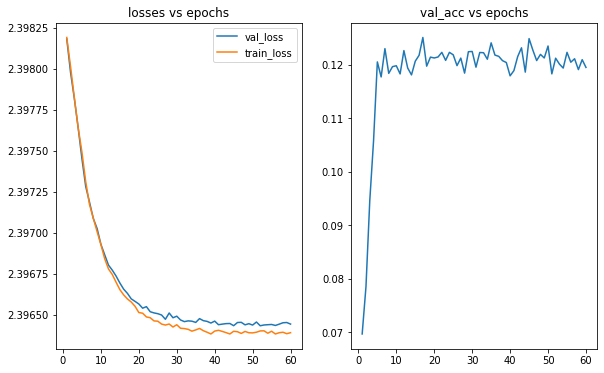

In [125]:
li1 = []
li2 = []
li3 = []
for dict1 in history2:
    li1.append(dict1["val_loss"])
    li2.append(dict1["val_acc"])
    li3.append(dict1["train_loss"])

fig =plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(range(1,epoch2+1), li1)
plt.plot(range(1,epoch2+1), li3)
plt.title("losses vs epochs")
plt.legend(["val_loss","train_loss"])


plt.subplot(1, 3, 2)
plt.plot(range(1,epoch2+1), li2)
plt.title("val_acc vs epochs")

plt.show()

In [126]:
test_list_sample = test_list[:100]

In [ ]:
for filename in test_list_sample:
    sample_image = Image.open(filename)
    sample_tensor = valid_tfms(sample_image)
    sample_tensor = sample_tensor.unsqueeze(0)
    print(sample_tensor.shape)
    sample_tensor = sample_tensor.to(device)
    print(sample_tensor.shape)
    output1, output2 = mymodel(sample_tensor)
    # print(output1)
    output1 = output1.to("cpu").detach().numpy()
    output2 = output2.to("cpu").detach().numpy()
    # print(output1)
    # print(output2)
    index1 = output1.argmax()
    index2 = output2.argmax()
    color_value = {0:"white", 1:"black", 2:"gray", 3:"red", 4:"blue", 5:"green", 
                        6:"yellow", 7:"purple", 8:"brown", 9:"orange", 10:"anomaly"}
    # print(index1, index2)
    print(color_value[index1], color_value[index2])    
    img = mpimg.imread(filename)
    imgplot = plt.imshow(img)
    plt.show()
    # break

In [128]:
print(test_list[:5])

['/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/1/1_semicircle_white_green_5.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/M/M_quartercircle_black_white_3.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/A/A_circle_brown_gray_2.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/O/O_circle_red_gray_3.png', '/content/drive/MyDrive/SyntheticData/NewDataset/FinalData/1/1_rectangle_gray_black_5.png']


In [129]:
correct_predictions = 0
no_count = 0
for filename in tqdm(test_list):
    sample_image = Image.open(filename)
    sample_tensor = valid_tfms(sample_image)
    sample_tensor = sample_tensor.unsqueeze(0)
    # print(sample_tensor.shape)
    sample_tensor = sample_tensor.to(device)
    # print(sample_tensor.shape)
    output1, output2 = mymodel(sample_tensor)
    # print(output1)
    output1 = output1.to("cpu").detach().numpy()
    output2 = output2.to("cpu").detach().numpy()
    # print(output1)
    # print(output2)
    index1 = output1.argmax()
    index2 = output2.argmax()
    color_value = {0:"white", 1:"black", 2:"gray", 3:"red", 4:"blue", 5:"green", 
                        6:"yellow", 7:"purple", 8:"brown", 9:"orange", 10:"anomaly"}
    # print(index1, index2)
    prediction1, prediction2 = color_value[index1], color_value[index2]
    # print(color_value[index1], color_value[index2])    
    filename = filename.split("/")[-1]
    try:
      letter_color, shape_color = filename.split("_")[2:4]
    except:
      letter_color, shape_color = "anomaly", "anomaly" 

    # color_value2 = {"white":0, "black":1, "gray":2, "red":3, "blue":4, "green":5, 
    #                 "yellow":6, "purple":7, "brown":8, "orange":9}
    
    # if letter_color in color_value2:
    #   letter_color_value = color_value2[letter_color]
    # else:
    #   letter_color_value = 10 # anomaly
    
    # if shape_color in color_value2:
    #   shape_color_value = color_value2[shape_color]
    # else:
    #   shape_color_value = 10 # anomaly
    ground1, ground2 = letter_color, shape_color

    if ground1 == prediction1:
      correct_predictions += 1
    if ground2 == prediction2:
      correct_predictions += 1
    no_count += 2

    # img = mpimg.imread(filename)
    # imgplot = plt.imshow(img)
    # plt.show()
    # break

print("Test accuracy : ", correct_predictions/no_count)

  0%|          | 0/5196 [00:00<?, ?it/s]

Test accuracy :  0.11345265588914549


In [130]:
test_acc = correct_predictions/no_count
print(test_acc)

0.11345265588914549


In [131]:
mymodel.eval()
model = mymodel.cpu()
torch.save(model, '/content/drive/MyDrive/SyntheticData/color_detection_{}.pth'.format(test_acc))

In [132]:
for filename in test_list_sample:
    sample_image = Image.open(filename)
    sample_tensor = valid_tfms(sample_image)
    sample_tensor = sample_tensor.unsqueeze(0)
    sample_tensor = sample_tensor.to(device)
    output = model_loaded(sample_tensor)
    #print(output)
    output = output.to("cpu").detach().numpy()
    #print(output)
    index = output[0].argmax()
    if index == 0:
        print("A")
    elif index == 1:
        print("B")
    elif index == 2:
        print("C")
    elif index == 3:
        print("D")
    elif index == 4:
        print("E")
    elif index == 5:
        print("F")
    elif index == 6:
        print("G")
    elif index == 7:
        print("H")
    elif index == 8:
        print("I")
    elif index == 9:
        print("J")
    elif index == 10:
        print("K")
    elif index == 11:
        print("L")
    elif index == 12:
        print("M")
    elif index == 13:
        print("N")
    elif index == 14:
        print("O")
    elif index == 15:
        print("P")
    elif index == 16:
        print("Q")
    elif index == 17:
        print("R")
    elif index == 18:
        print("S")
    elif index == 19:
        print("T")
    elif index == 20:
        print("U")
    elif index == 21:
        print("V")
    elif index == 22:
        print("W")
    elif index == 23:
        print("X")
    elif index == 24:
        print("Y")
    elif index == 25:
        print("Z")
    elif index == 26:
        print("0")
    elif index == 27:
        print("1")
    elif index == 28:
        print("2")
    elif index == 29:
        print("3")
    elif index == 30:
        print("4")
    elif index == 31:
        print("5")
    elif index == 32:
        print("6")
    elif index == 33:
        print("7")
    elif index == 34:
        print("8")
    elif index == 35:
        print("9")
    img = mpimg.imread(filename)
    imgplot = plt.imshow(img)
    plt.show()

NameError: ignored

In [ ]:
# /content/auvsi-suas-dataset/generated_data/letters/A/circle_A_0.jpg

In [ ]:
img = mpimg.imread("/content/auvsi-suas-dataset/generated_data/letters/A/circle_A_0.jpg")
imgplot = plt.imshow(img)
print(imgplot.size)
plt.show()

In [ ]:
from PIL import Image

im = Image.open('/content/auvsi-suas-dataset/generated_data/letters/A/circle_A_0.jpg')
width, height = im.size
print(width, height)

In [ ]:
from PIL import Image

im = Image.open('/content/F_circle_16.png')
width, height = im.size
print(width, height)

In [ ]:
# /content/drive/MyDrive/SyntheticData/noisy_FinalDataset/J/noisy_J_pentagon_408.png

In [ ]:
img = cv2.imread("/content/drive/MyDrive/SyntheticData/noisy_FinalDataset/J/noisy_J_pentagon_408.png")
cv2_imshow(img)

In [ ]:
print(img)

In [ ]:
train_list = []
valid_list = []
test_list  = []

letter_list = os.listdir("/content/drive/MyDrive/SyntheticData/noisy_FinalDataset")
print(letter_list)

dict1 = dict()

for alphabet in letter_list:
  li = os.listdir("/content/drive/MyDrive/SyntheticData/noisy_FinalDataset/" + alphabet)
  print(alphabet,len(li))
  dict1[alphabet] = len(li)
  for i in range(len(li)):
    li[i] = "/content/drive/MyDrive/SyntheticData/noisy_FinalDataset/" + alphabet + "/" + li[i]
  random.shuffle(li)
  length = len(li)
  train_list.extend(li[:int(length*0.7)][:100])
  valid_list.extend(li[int(length*0.7):int(length*0.7)+int(length*0.2)][:20])
  test_list.extend(li[int(length*0.7)+int(length*0.2):][:10])

random.shuffle(train_list)
random.shuffle(valid_list)
random.shuffle(test_list)

In [ ]:
dict1

In [ ]:
train_list = []
valid_list = []
test_list  = []

letter_list = os.listdir("/content/drive/MyDrive/SyntheticData/FinalDataset")
print(letter_list)

dict2 = dict()

for alphabet in letter_list:
  li = os.listdir("/content/drive/MyDrive/SyntheticData/FinalDataset/" + alphabet)
  print(alphabet,len(li))
  dict2[alphabet] = len(li)
  for i in range(len(li)):
    li[i] = "/content/drive/MyDrive/SyntheticData/FinalDataset/" + alphabet + "/" + li[i]
  random.shuffle(li)
  length = len(li)
  train_list.extend(li[:int(length*0.7)][:100])
  valid_list.extend(li[int(length*0.7):int(length*0.7)+int(length*0.2)][:20])
  test_list.extend(li[int(length*0.7)+int(length*0.2):][:10])

random.shuffle(train_list)
random.shuffle(valid_list)
random.shuffle(test_list)

In [ ]:
dict2

In [ ]:
li = dict1.keys()
print(li)

In [ ]:
li[]